# Тесты единичного корня (пакет [`statsmodels`](https://www.statsmodels.org/stable/index.html))

In [1]:
import numpy as np
import pandas as pd

from statsmodels.tsa.api import adfuller, kpss, range_unit_root_test

import pandas_datareader.data as web

# настройки визуализации
import matplotlib.pyplot as plt

# Не показывать Warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)

Загрузим из БД [`FRED`](https://fred.stlouisfed.org/) квартальные данные по ВВП (Symbol [`GDP`](https://fred.stlouisfed.org/series/GDP)) с 1990 Q1 по 2023 Q4 и создадим ряд `y`=log(GDP)

In [2]:
y = np.log( web.DataReader(name='GDP', data_source='fred', start='1990-1', end='2023-12') )

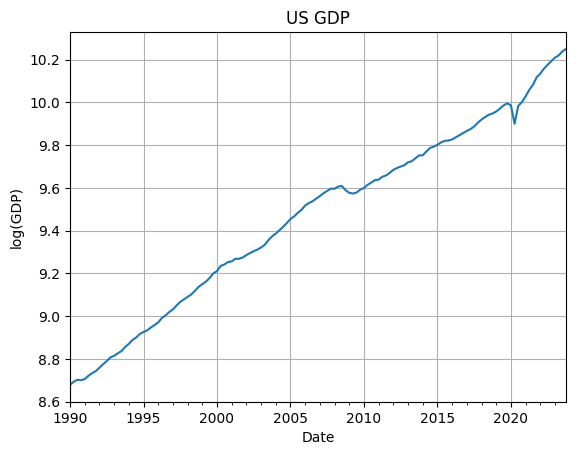

In [3]:
ax = y.plot(title='US GDP')

# надпись по ос oX
ax.set_xlabel('Date')
# надпись по ос oY
ax.set_ylabel('log(GDP)')
# отобразить сетку
ax.grid()
# удалим легенду
ax.legend().remove()

plt.show()

## ADF-тест

Используем метод [`adfuller`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html#statsmodels.tsa.stattools.adfuller)

__Параметры теста__

|Параметр|Значение|Описание|
|-|-|-|
|`maxlag`|`None, int`|Максимальное число лагов (по умолчанию $12*(T/100)^{1/4}$)|
|`regression`|`“c”,”ct”,”ctt”,”n”`|Вариант теста: _const, linear trend, quadratic trend, zero mean_|
|`autolag`|`“AIC”, “BIC”, “t-stat”, None`|Критерий автоматического выбора числа лагов|

Выберем вариант теста
* с трендом
* с автоматическим выбором лагов по критерию BIC

In [4]:
adf_stat, pval, usedlag, nobs, critical_values, BIC = adfuller(y, regression='ct', autolag='BIC')
# тестовая статистика, её p-значение и критические значения
adf_stat, pval, critical_values

(np.float64(-1.6638086126474405),
 np.float64(0.7664601844733989),
 {'1%': np.float64(-4.027444361631865),
  '5%': np.float64(-3.443525725854798),
  '10%': np.float64(-3.146427052278616)})

## KPSS-тест

Используем метод [`kpss`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.kpss.html#statsmodels.tsa.stattools.kpss)

__Параметры теста__

|Параметр|Значение|Описание|
|-|-|-|
|`regression`|`“c”,”ct”`|Вариант теста: _const, linear trend_|


Выберем вариант теста с трендом

In [5]:
kpss_stat, p_value, lags, crit = kpss(y, regression='ct')
# тестовая статистика, её p-значение и критические значения
kpss_stat, p_value, crit

(np.float64(0.3398286457312108),
 np.float64(0.01),
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

## RUR-тест

Используем метод [`range_unit_root_test`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.range_unit_root_test.html#statsmodels.tsa.stattools.range_unit_root_test)

__Важно__: тестируем

$$
\begin{aligned}
	H_0&:I(0) & &vs & H_1&:I(1)
\end{aligned}
$$

(__нет варианта с трендом!__)

Применим для первой разности

In [6]:
rur_stat, p_value, crit = range_unit_root_test(y.diff().dropna())
# тестовая статистика, её p-значение и критические значения
rur_stat, p_value, crit

(np.float64(1.1188618555710317),
 0.05,
 {'10%': np.float64(1.3172199999999998),
  '5%': np.float64(1.17319),
  '2.5%': np.float64(1.06105),
  '1%': np.float64(0.94011)})